In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm


In [2]:
#한글 시각화
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
#Data Load

# x train
x_train1 = np.load('npy_bodyInfo/x_train.npz1.npz')['arr_0']
x_train2 = np.load('npy_bodyInfo/x_train.npz2.npz')['arr_0']
x_train3 = np.load('npy_bodyInfo/x_train.npz3.npz')['arr_0']
x_train4 = np.load('npy_bodyInfo/x_train.npz4.npz')['arr_0']

# x concat
x_train = np.concatenate((x_train1,x_train2))
x_train = np.concatenate((x_train,x_train3))
x_train = np.concatenate((x_train,x_train4))

# y
y_train1 = np.load('npy_bodyInfo/y_train.npz1.npz')['arr_0']
y_train2 = np.load('npy_bodyInfo/y_train.npz2.npz')['arr_0']
y_train3 = np.load('npy_bodyInfo/y_train.npz3.npz')['arr_0']
y_train4 = np.load('npy_bodyInfo/y_train.npz4.npz')['arr_0']

#y concat
y_train = np.concatenate((y_train1,y_train2))
y_train = np.concatenate((y_train,y_train3))
y_train = np.concatenate((y_train,y_train4))

del x_train1, x_train2, x_train3, x_train4 , y_train1, y_train2, y_train3, y_train4

###### make train DataFrame Using npy

In [4]:
bodyInfoList = ['age','sex','weight','height']
abpList = ['abp_' + str(i) for i in range(1,2001)]
dfColList = bodyInfoList + abpList

train_df = pd.DataFrame(x_train)
train_df.columns = dfColList

train_df['label'] = y_train
train_df['bmi'] = train_df['weight'] / (train_df['height'] * train_df['height']) * 10000
train_df

,age,sex,weight,height,abp_1,abp_2,abp_3,abp_4,abp_5,abp_6,...,abp_1993,abp_1994,abp_1995,abp_1996,abp_1997,abp_1998,abp_1999,abp_2000,label,bmi
0,77.0,1.0,67.5,160.199997,90.900002,91.900002,90.900002,89.900002,89.900002,88.000000,...,90.900002,90.900002,89.900002,89.900002,88.900002,89.900002,89.900002,90.900002,False,26.301395
1,77.0,1.0,67.5,160.199997,88.900002,87.000000,87.000000,86.000000,85.000000,84.000000,...,88.000000,81.000000,83.000000,94.900002,104.699997,101.800003,88.900002,74.099998,False,26.301395
2,77.0,1.0,67.5,160.199997,76.099998,69.199997,64.300003,61.299999,64.300003,70.199997,...,72.199997,71.199997,73.099998,74.099998,80.099998,87.000000,96.800003,108.699997,False,26.301395
3,77.0,1.0,67.5,160.199997,83.000000,82.000000,81.000000,81.000000,79.099998,79.099998,...,79.099998,79.099998,79.099998,78.099998,77.099998,76.099998,75.099998,73.099998,False,26.301395
4,77.0,1.0,67.5,160.199997,129.399994,119.599998,115.599998,117.599998,119.599998,111.699997,...,155.100006,153.100006,147.199997,141.300003,135.399994,129.399994,121.500000,114.599998,False,26.301395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929578,47.0,0.0,51.5,150.000000,75.099998,75.099998,74.099998,74.099998,73.099998,73.099998,...,91.900002,89.900002,88.000000,87.000000,85.000000,84.000000,84.000000,83.000000,False,22.888889
929579,47.0,0.0,51.5,150.000000,64.300003,66.199997,68.199997,72.199997,77.099998,84.000000,...,104.699997,104.699997,103.800003,101.800003,99.800003,99.800003,105.699997,108.699997,False,22.888889
929580,47.0,0.0,51.5,150.000000,70.199997,70.199997,69.199997,68.199997,69.199997,68.199997,...,106.699997,107.699997,107.699997,108.699997,107.699997,107.699997,107.699997,106.699997,False,22.888889
929581,47.0,0.0,51.5,150.000000,69.199997,69.199997,68.199997,68.199997,67.199997,67.199997,...,94.900002,95.900002,94.900002,90.900002,88.000000,85.000000,84.000000,84.000000,False,22.888889


# EDA 

1. 성별
    - 남자 : 1
    - 여자 : 0
    
2. BMI : 몸무게/(키)^2
3. 나이

<AxesSubplot:xlabel='age', ylabel='Count'>

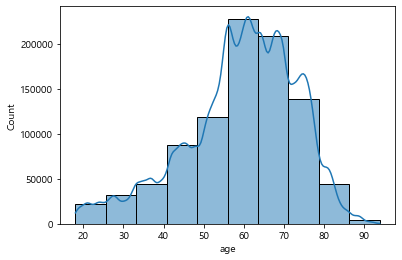

In [5]:
#전체적인 나이 분포

sns.histplot(train_df['age'], bins = 10 , kde = True , label = 'False')

<AxesSubplot:xlabel='sex', ylabel='count'>

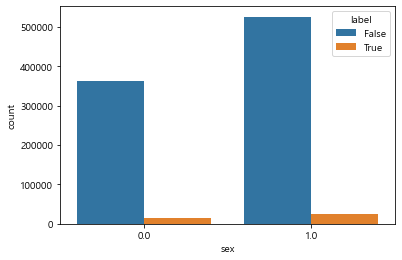

In [6]:
sns.countplot(x = 'sex', data = train_df , hue = 'label')

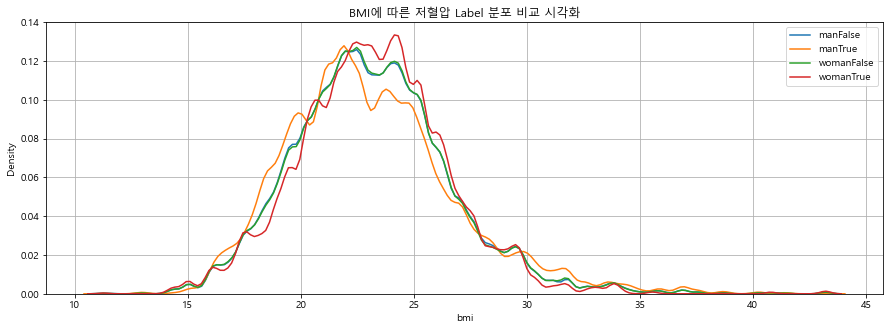

In [7]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.title('BMI에 따른 저혈압 Label 분포 비교 시각화')
sns.kdeplot(train_df.loc[(train_df['sex']==0)|(train_df['label']==False) , 'bmi'] , label = 'manFalse')
sns.kdeplot(train_df.loc[(train_df['sex']==0)|(train_df['label']==True) , 'bmi'] , label = 'manTrue')

sns.kdeplot(train_df.loc[(train_df['sex']==1)|(train_df['label']==False) , 'bmi'] , label = 'womanFalse')
sns.kdeplot(train_df.loc[(train_df['sex']==1)|(train_df['label']==True) , 'bmi'] , label = 'womanTrue')

plt.legend()
plt.show()

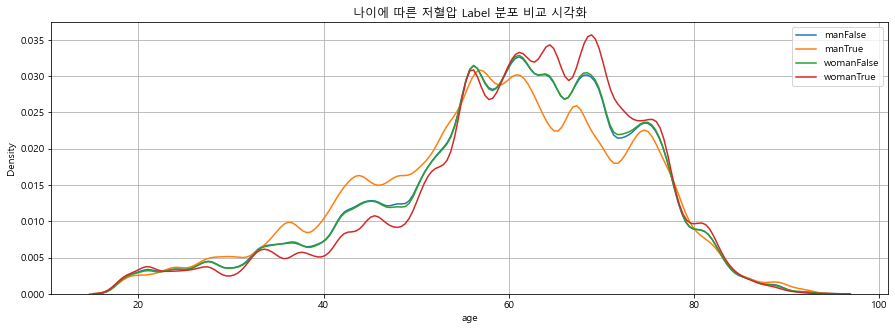

In [8]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.title('나이에 따른 저혈압 Label 분포 비교 시각화')
sns.kdeplot(train_df.loc[(train_df['sex']==0)|(train_df['label']==False) , 'age'] , label = 'manFalse')
sns.kdeplot(train_df.loc[(train_df['sex']==0)|(train_df['label']==True) , 'age'] , label = 'manTrue')

sns.kdeplot(train_df.loc[(train_df['sex']==1)|(train_df['label']==False) , 'age'] , label = 'womanFalse')
sns.kdeplot(train_df.loc[(train_df['sex']==1)|(train_df['label']==True) , 'age'] , label = 'womanTrue')

plt.legend()
plt.show()

label
False    23.181223
True     23.137632
Name: bmi, dtype: float32


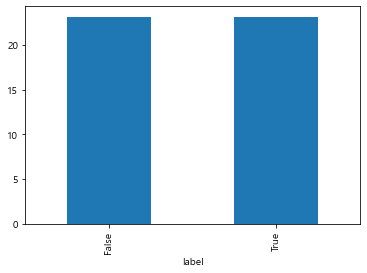

In [9]:
train_df.groupby('label')['bmi'].mean().plot(kind = 'bar')
print(train_df.groupby('label')['bmi'].mean())

sex
0.0    0.041458
1.0    0.044357
Name: label, dtype: float64
0 : 여자 , 1 : 남자 //남자가 걸릴확률 조금 더 높은것같은데 별 차이도 없어보임


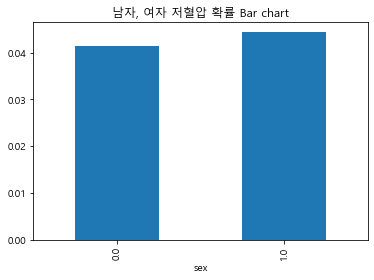

In [10]:
train_df.groupby('sex')['label'].mean().plot(kind = 'bar')
plt.title('남자, 여자 저혈압 확률 Bar chart')
print(train_df.groupby('sex')['label'].mean())

print('0 : 여자 , 1 : 남자 //남자가 걸릴확률 조금 더 높은것같은데 별 차이도 없어보임')

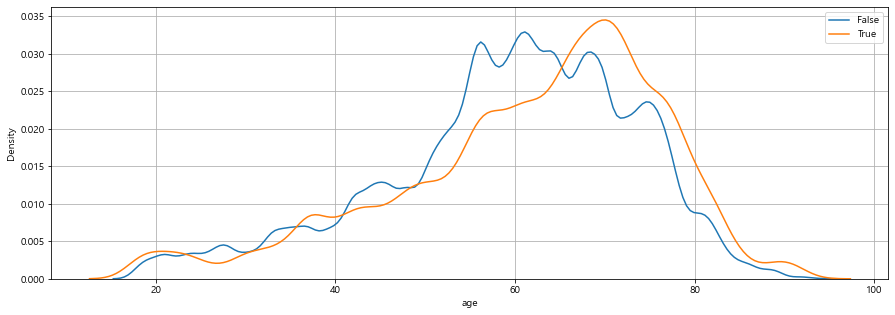

In [11]:
plt.figure(figsize = (15,5))
plt.grid(True)

sns.kdeplot(x = 'age', data = train_df[train_df['label'] == False] ,label  = 'False')
sns.kdeplot(x = 'age', data = train_df[train_df['label'] == True]  , label = 'True')
plt.title('')
plt.legend()

plt.show()

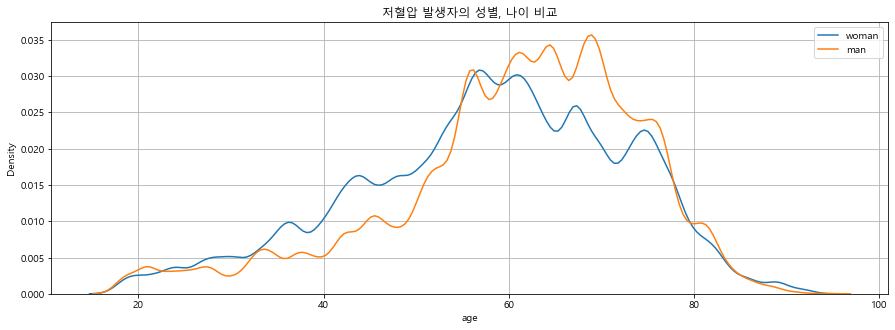

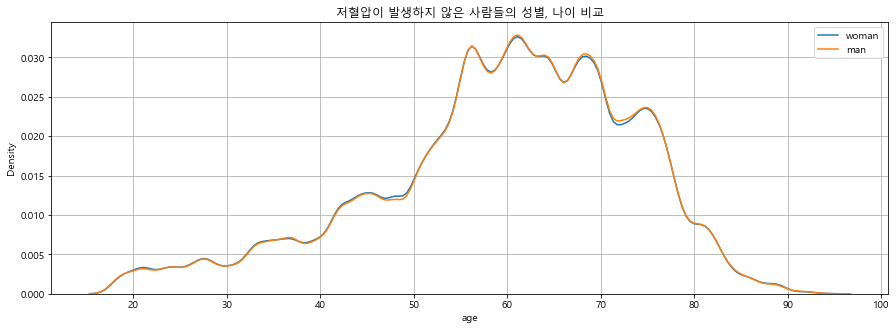

In [12]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.title('저혈압 발생자의 성별, 나이 비교')
sns.kdeplot(x = 'age', data = train_df.loc[(train_df['sex'] == 0)|(train_df['label'] == True)] ,label  = 'woman')
sns.kdeplot(x = 'age', data = train_df.loc[(train_df['sex'] == 1)|(train_df['label'] == True)] ,label  = 'man')
plt.legend()
plt.show()


plt.figure(figsize = (15,5))
plt.grid(True)
plt.title('저혈압이 발생하지 않은 사람들의 성별, 나이 비교')
sns.kdeplot(x = 'age', data = train_df.loc[(train_df['sex'] == 0)|(train_df['label'] == False)] ,label  = 'woman')
sns.kdeplot(x = 'age', data = train_df.loc[(train_df['sex'] == 1)|(train_df['label'] == False)] ,label  = 'man')
plt.legend()
plt.show()


In [13]:
train_df

,age,sex,weight,height,abp_1,abp_2,abp_3,abp_4,abp_5,abp_6,...,abp_1993,abp_1994,abp_1995,abp_1996,abp_1997,abp_1998,abp_1999,abp_2000,label,bmi
0,77.0,1.0,67.5,160.199997,90.900002,91.900002,90.900002,89.900002,89.900002,88.000000,...,90.900002,90.900002,89.900002,89.900002,88.900002,89.900002,89.900002,90.900002,False,26.301395
1,77.0,1.0,67.5,160.199997,88.900002,87.000000,87.000000,86.000000,85.000000,84.000000,...,88.000000,81.000000,83.000000,94.900002,104.699997,101.800003,88.900002,74.099998,False,26.301395
2,77.0,1.0,67.5,160.199997,76.099998,69.199997,64.300003,61.299999,64.300003,70.199997,...,72.199997,71.199997,73.099998,74.099998,80.099998,87.000000,96.800003,108.699997,False,26.301395
3,77.0,1.0,67.5,160.199997,83.000000,82.000000,81.000000,81.000000,79.099998,79.099998,...,79.099998,79.099998,79.099998,78.099998,77.099998,76.099998,75.099998,73.099998,False,26.301395
4,77.0,1.0,67.5,160.199997,129.399994,119.599998,115.599998,117.599998,119.599998,111.699997,...,155.100006,153.100006,147.199997,141.300003,135.399994,129.399994,121.500000,114.599998,False,26.301395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929578,47.0,0.0,51.5,150.000000,75.099998,75.099998,74.099998,74.099998,73.099998,73.099998,...,91.900002,89.900002,88.000000,87.000000,85.000000,84.000000,84.000000,83.000000,False,22.888889
929579,47.0,0.0,51.5,150.000000,64.300003,66.199997,68.199997,72.199997,77.099998,84.000000,...,104.699997,104.699997,103.800003,101.800003,99.800003,99.800003,105.699997,108.699997,False,22.888889
929580,47.0,0.0,51.5,150.000000,70.199997,70.199997,69.199997,68.199997,69.199997,68.199997,...,106.699997,107.699997,107.699997,108.699997,107.699997,107.699997,107.699997,106.699997,False,22.888889
929581,47.0,0.0,51.5,150.000000,69.199997,69.199997,68.199997,68.199997,67.199997,67.199997,...,94.900002,95.900002,94.900002,90.900002,88.000000,85.000000,84.000000,84.000000,False,22.888889


<AxesSubplot:xlabel='age', ylabel='Count'>

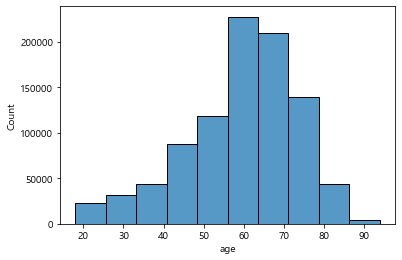

In [14]:
sns.histplot(x = 'age', data = train_df ,label  = 'man' , bins = 10)

<AxesSubplot:xlabel='age', ylabel='Count'>

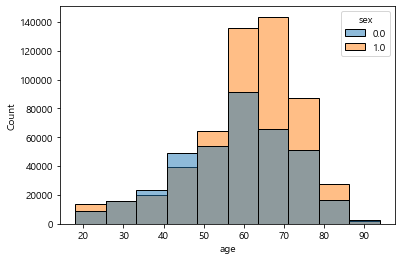

In [15]:
sns.histplot(x = 'age', data = train_df ,label  = 'man' , bins = 10, hue = 'sex')

In [16]:
train_df['ageGroup'] = train_df['age'].apply(lambda x : int(x/5))
train_df

,age,sex,weight,height,abp_1,abp_2,abp_3,abp_4,abp_5,abp_6,...,abp_1994,abp_1995,abp_1996,abp_1997,abp_1998,abp_1999,abp_2000,label,bmi,ageGroup
0,77.0,1.0,67.5,160.199997,90.900002,91.900002,90.900002,89.900002,89.900002,88.000000,...,90.900002,89.900002,89.900002,88.900002,89.900002,89.900002,90.900002,False,26.301395,15
1,77.0,1.0,67.5,160.199997,88.900002,87.000000,87.000000,86.000000,85.000000,84.000000,...,81.000000,83.000000,94.900002,104.699997,101.800003,88.900002,74.099998,False,26.301395,15
2,77.0,1.0,67.5,160.199997,76.099998,69.199997,64.300003,61.299999,64.300003,70.199997,...,71.199997,73.099998,74.099998,80.099998,87.000000,96.800003,108.699997,False,26.301395,15
3,77.0,1.0,67.5,160.199997,83.000000,82.000000,81.000000,81.000000,79.099998,79.099998,...,79.099998,79.099998,78.099998,77.099998,76.099998,75.099998,73.099998,False,26.301395,15
4,77.0,1.0,67.5,160.199997,129.399994,119.599998,115.599998,117.599998,119.599998,111.699997,...,153.100006,147.199997,141.300003,135.399994,129.399994,121.500000,114.599998,False,26.301395,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929578,47.0,0.0,51.5,150.000000,75.099998,75.099998,74.099998,74.099998,73.099998,73.099998,...,89.900002,88.000000,87.000000,85.000000,84.000000,84.000000,83.000000,False,22.888889,9
929579,47.0,0.0,51.5,150.000000,64.300003,66.199997,68.199997,72.199997,77.099998,84.000000,...,104.699997,103.800003,101.800003,99.800003,99.800003,105.699997,108.699997,False,22.888889,9
929580,47.0,0.0,51.5,150.000000,70.199997,70.199997,69.199997,68.199997,69.199997,68.199997,...,107.699997,107.699997,108.699997,107.699997,107.699997,107.699997,106.699997,False,22.888889,9
929581,47.0,0.0,51.5,150.000000,69.199997,69.199997,68.199997,68.199997,67.199997,67.199997,...,95.900002,94.900002,90.900002,88.000000,85.000000,84.000000,84.000000,False,22.888889,9


In [17]:
train_df['label'].mean()

0.04317419746273329

Text(0.5, 1.0, '나이대별로 저혈압 발생 확률 ')

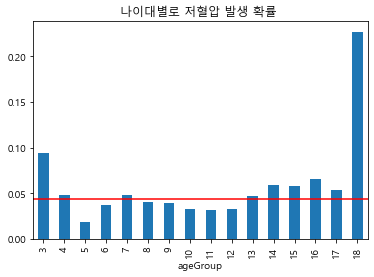

In [18]:
train_df.groupby('ageGroup')['label'].mean().plot(kind = 'bar')
plt.axhline(train_df['label'].mean() , color = 'r')
plt.title('나이대별로 저혈압 발생 확률 ')

Text(0.5, 1.0, '나이대 분포 Count')

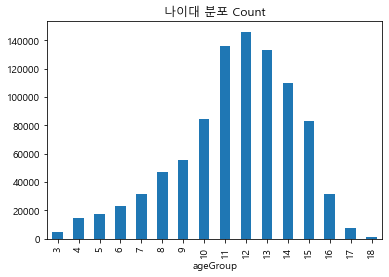

In [19]:
train_df.groupby('ageGroup')['label'].count().plot(kind = 'bar')
plt.title('나이대 분포 Count')

In [20]:
bodyInfo = train_df.loc[:,['age','sex','bmi','label']]
bodyInfo

,age,sex,bmi,label
0,77.0,1.0,26.301395,False
1,77.0,1.0,26.301395,False
2,77.0,1.0,26.301395,False
3,77.0,1.0,26.301395,False
4,77.0,1.0,26.301395,False
...,...,...,...,...
929578,47.0,0.0,22.888889,False
929579,47.0,0.0,22.888889,False
929580,47.0,0.0,22.888889,False
929581,47.0,0.0,22.888889,False


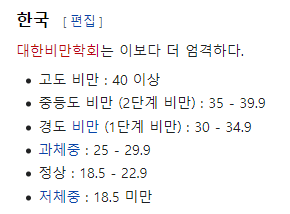

In [21]:
train_df

,age,sex,weight,height,abp_1,abp_2,abp_3,abp_4,abp_5,abp_6,...,abp_1994,abp_1995,abp_1996,abp_1997,abp_1998,abp_1999,abp_2000,label,bmi,ageGroup
0,77.0,1.0,67.5,160.199997,90.900002,91.900002,90.900002,89.900002,89.900002,88.000000,...,90.900002,89.900002,89.900002,88.900002,89.900002,89.900002,90.900002,False,26.301395,15
1,77.0,1.0,67.5,160.199997,88.900002,87.000000,87.000000,86.000000,85.000000,84.000000,...,81.000000,83.000000,94.900002,104.699997,101.800003,88.900002,74.099998,False,26.301395,15
2,77.0,1.0,67.5,160.199997,76.099998,69.199997,64.300003,61.299999,64.300003,70.199997,...,71.199997,73.099998,74.099998,80.099998,87.000000,96.800003,108.699997,False,26.301395,15
3,77.0,1.0,67.5,160.199997,83.000000,82.000000,81.000000,81.000000,79.099998,79.099998,...,79.099998,79.099998,78.099998,77.099998,76.099998,75.099998,73.099998,False,26.301395,15
4,77.0,1.0,67.5,160.199997,129.399994,119.599998,115.599998,117.599998,119.599998,111.699997,...,153.100006,147.199997,141.300003,135.399994,129.399994,121.500000,114.599998,False,26.301395,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929578,47.0,0.0,51.5,150.000000,75.099998,75.099998,74.099998,74.099998,73.099998,73.099998,...,89.900002,88.000000,87.000000,85.000000,84.000000,84.000000,83.000000,False,22.888889,9
929579,47.0,0.0,51.5,150.000000,64.300003,66.199997,68.199997,72.199997,77.099998,84.000000,...,104.699997,103.800003,101.800003,99.800003,99.800003,105.699997,108.699997,False,22.888889,9
929580,47.0,0.0,51.5,150.000000,70.199997,70.199997,69.199997,68.199997,69.199997,68.199997,...,107.699997,107.699997,108.699997,107.699997,107.699997,107.699997,106.699997,False,22.888889,9
929581,47.0,0.0,51.5,150.000000,69.199997,69.199997,68.199997,68.199997,67.199997,67.199997,...,95.900002,94.900002,90.900002,88.000000,85.000000,84.000000,84.000000,False,22.888889,9


<AxesSubplot:xlabel='sex,bmiIndex'>

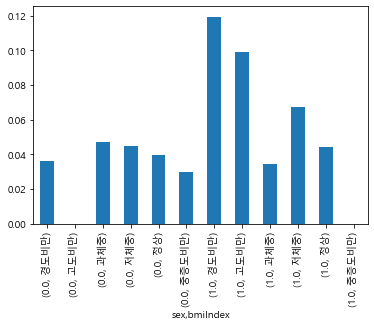

In [72]:
train_df['bmiIndex'] = train_df['bmi'].apply(lambda x : '고도비만' if x>=40 \
                                             else'중증도비만' if x>=35 \
                                             else '경도비만' if x>=30 \
                                             else '과체중' if x>=25 \
                                             else '정상' if x >=18.5 \
                                             else '저체중')

train_df.groupby(['sex','bmiIndex'])['label'].mean().plot(kind = 'bar')
#0 : 여자 ,  1 : 남자

<AxesSubplot:xlabel='sex,bmiIndex'>

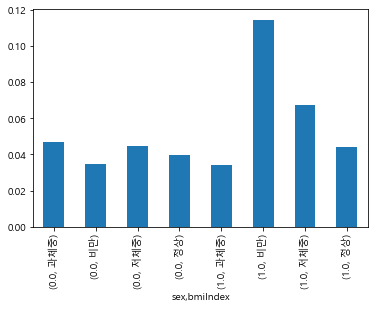

In [74]:
train_df['bmiIndex'] = train_df['bmi'].apply(lambda x : '비만' if x>=30 \
                                             else'과체중' if x>=25 \
                                             else '정상' if x>=18.5 \
                                             else '저체중')

train_df.groupby(['sex','bmiIndex'])['label'].mean().plot(kind = 'bar')
#0 : 여자 ,  1 : 남자

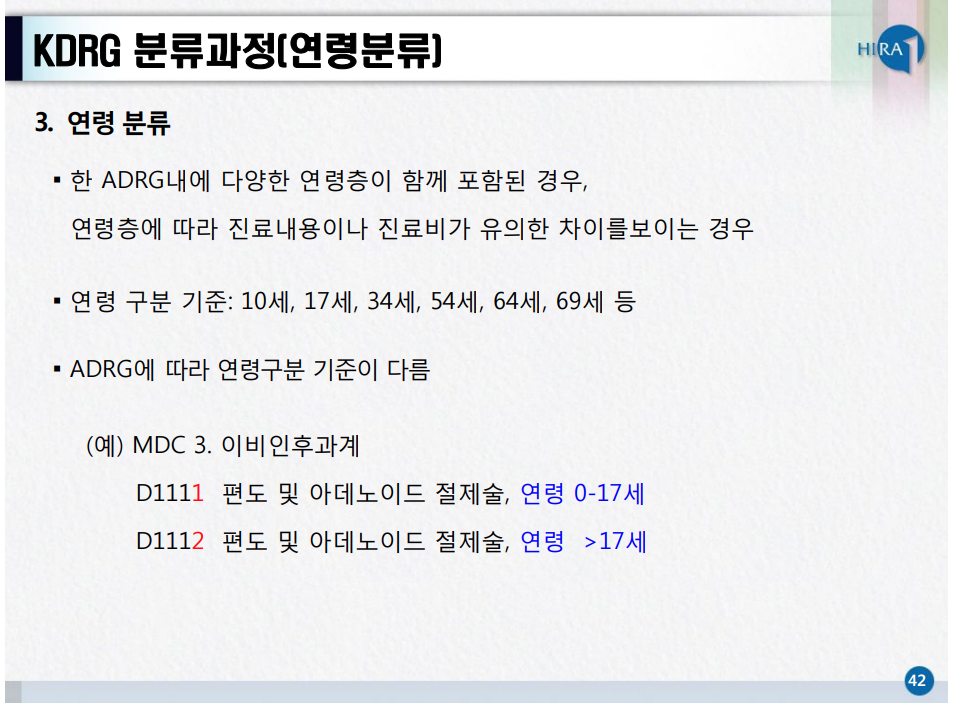

In [24]:
train_df['ageGroup'] = train_df['age'].apply(lambda x : '청년' 
                                                         if x<34 else '중년' 
                                                         if x<54 else'장년'
                                                         if x<64 else '노년')


<AxesSubplot:xlabel='ageGroup'>

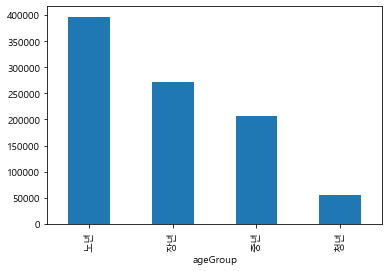

In [25]:
train_df.groupby('ageGroup')['label'].count().plot(kind =  'bar')

Text(0.5, 1.0, '연령 분류에 따른 저혈압 발생률')

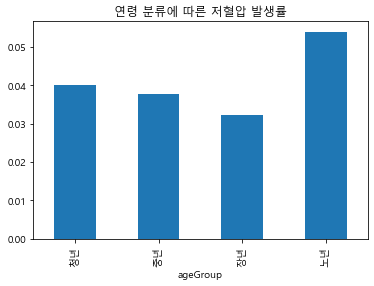

In [33]:
train_df.groupby(['ageGroup'])['label'].mean().sort_index(ascending = False).plot(kind = 'bar')
plt.title('연령 분류에 따른 저혈압 발생률')

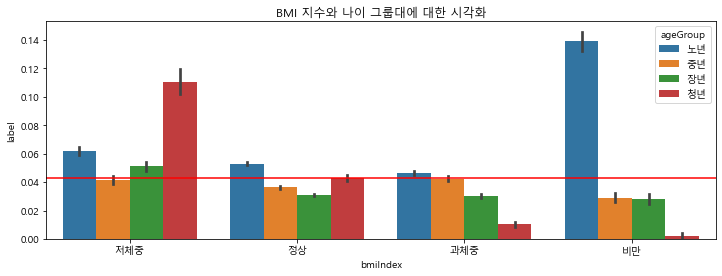

In [80]:
plt.figure(figsize = (12,4))
ax = sns.barplot(x = 'bmiIndex', y = 'label' , data = train_df , hue = 'ageGroup', 
           order = ['저체중','정상','과체중','비만'])

#ax.set_xticklabels(['여자','남자'])

plt.title('BMI 지수와 나이 그룹대에 대한 시각화')
plt.axhline(train_df['label'].mean() , color = 'r')

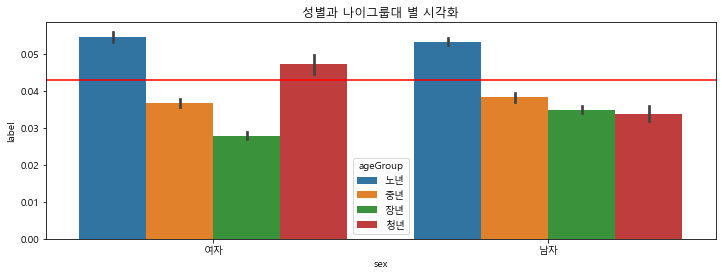

In [79]:
plt.figure(figsize = (12,4))
ax = sns.barplot(x = 'sex', y = 'label' , data = train_df , hue = 'ageGroup')


ax.set_xticklabels(['여자','남자'])

plt.title('성별과 나이그룹대 별 시각화')
plt.axhline(train_df['label'].mean() , color = 'r')

In [62]:
train_df.groupby('bmiIndex')['label'].mean()

bmiIndex
과체중    0.038870
비만     0.062111
저체중    0.056669
정상     0.042287
Name: label, dtype: float64

<AxesSubplot:xlabel='sex,bmiIndex,ageGroup'>

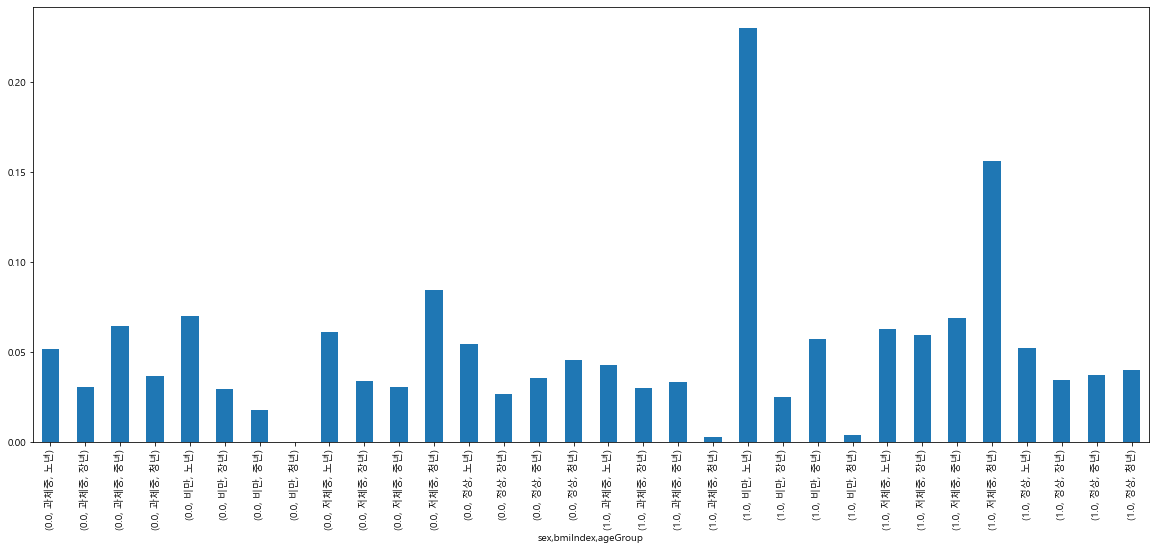

In [69]:
plt.figure(figsize = (20,8))
train_df.groupby(['sex','bmiIndex','ageGroup'])['label'].mean().plot(kind = 'bar')